In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip lungs-disease-dataset-4-types.zip

Streaming output truncated to the last 5000 lines.
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0673-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0675-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0678-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0680-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0682-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0683-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0684-0001-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0686-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0690-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0692-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0693-0001.jpeg  
  inflating: Lung Disease Dataset/train/Normal/NORMAL2-IM-0695-0001.jpeg  
  inflating: Lung Disease Dataset/train/Norm

In [ ]:
from tensorflow import keras
from keras import layers
from keras.applications import ResNet50
from keras.optimizers import Adam,SGD,RMSprop
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import plotly
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import pyplot as plt
import seaborn as sns
import cv2

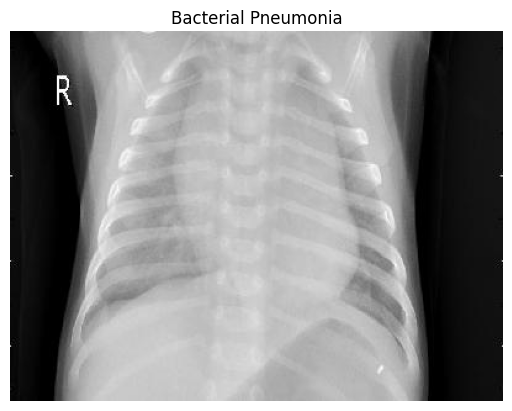

In [ ]:
plt.title('Bacterial Pneumonia'); plt.axis('off'); plt.imshow(cv2.imread('/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg'))

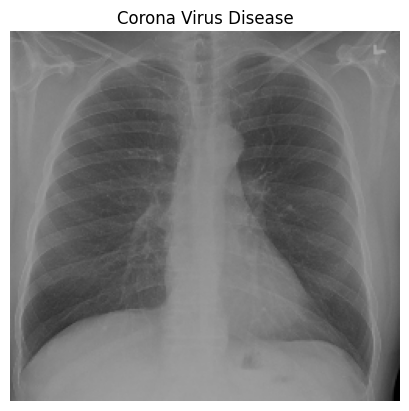

In [ ]:
plt.title('Corona Virus Disease'); plt.axis('off');plt.imshow(cv2.imread('/content/Lung Disease Dataset/train/Corona Virus Disease/00030348_000.png'))

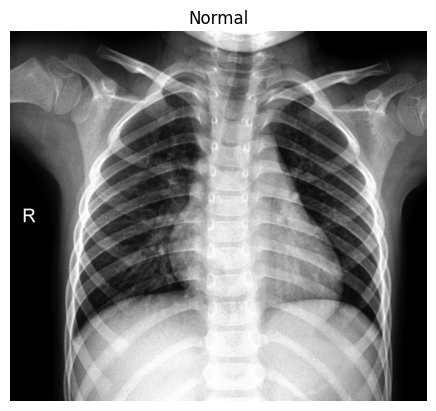

In [ ]:
plt.title('Normal'); plt.axis('off'); plt.imshow(cv2.imread('/content/Lung Disease Dataset/train/Normal/0101.jpeg'))

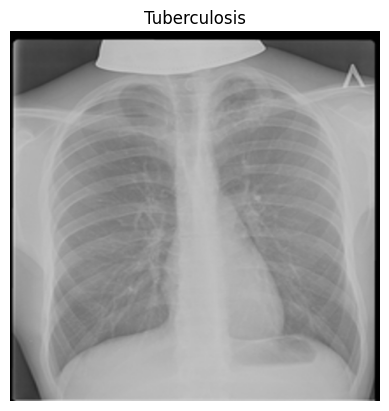

In [ ]:
plt.title('Tuberculosis'); plt.axis('off');plt.imshow(cv2.imread('/content/Lung Disease Dataset/train/Tuberculosis/Tuberculosis-102.jpg'))

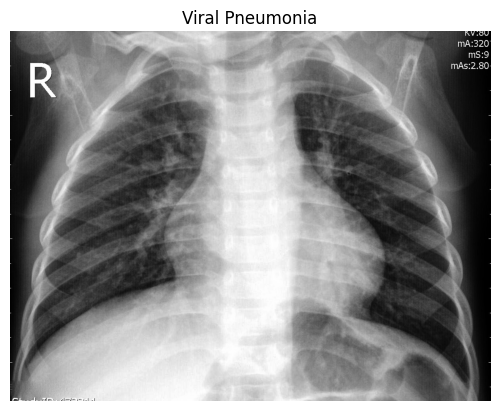

In [ ]:
plt.title('Viral Pneumonia'); plt.axis('off');plt.imshow(cv2.imread('/content/Lung Disease Dataset/train/Viral Pneumonia/012.jpeg'))

In [ ]:
testGen = ImageDataGenerator()
trainGen = ImageDataGenerator(validation_split=0.15,vertical_flip=True,horizontal_flip=True,rotation_range=0.2)
trainGenerator = trainGen.flow_from_directory("/content/Lung Disease Dataset/train",subset="training",target_size=(224,224))
validationGenerator = trainGen.flow_from_directory("/content/Lung Disease Dataset/val",target_size=(224,224),shuffle=False)
testGenerator = testGen.flow_from_directory( "/content/Lung Disease Dataset/test",target_size=(224,224),shuffle=False)

Found 5148 images belonging to 5 classes.
Found 2016 images belonging to 5 classes.
Found 2025 images belonging to 5 classes.


Data Visualizations:-


Grayscale intensity with histogram

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale_frequency_histogram(image_path):

    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not open or read the image.")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    plt.figure()
    plt.title("Grayscale Frequency Histogram")
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.xlim(0, 255)
    plt.plot(histogram)
    plt.show()

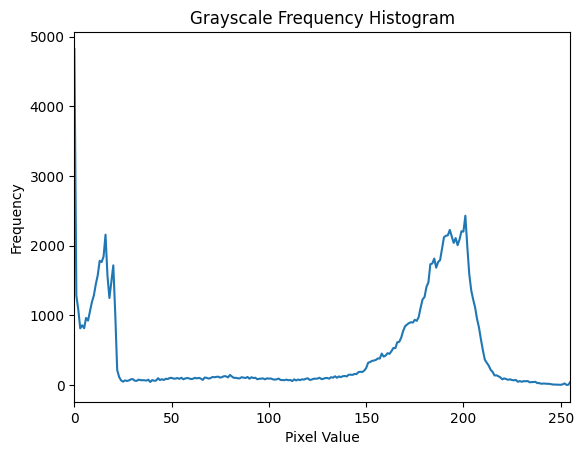

In [ ]:
# Bacterial Pneumonia
image_path = '/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg'
grayscale_frequency_histogram(image_path)

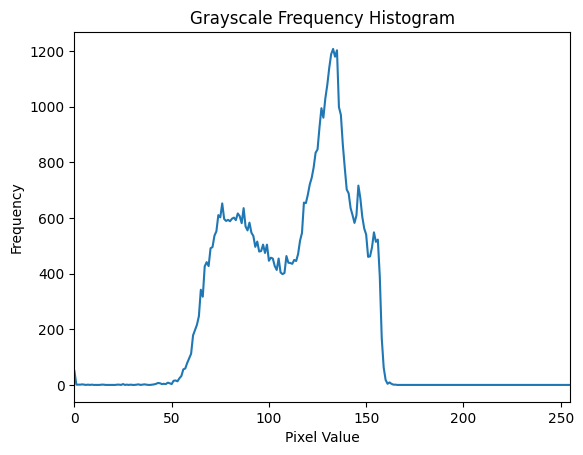

In [ ]:
#Corona Virus
image_path = '/content/Lung Disease Dataset/train/Corona Virus Disease/00030348_000.png'
grayscale_frequency_histogram(image_path)

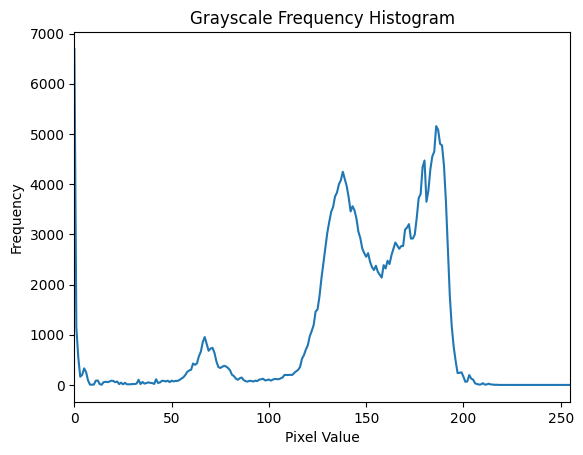

In [ ]:
# Tuberculosis
image_path = '/content/Lung Disease Dataset/train/Tuberculosis/Tuberculosis-102.jpg'
grayscale_frequency_histogram(image_path)

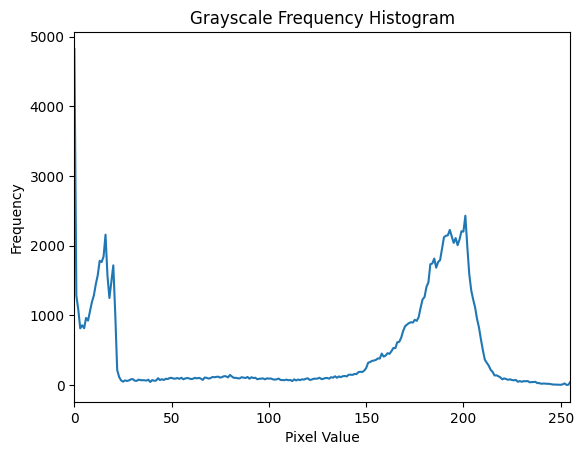

In [ ]:
# Bacterial Pneumonia
image_path = '/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg'
grayscale_frequency_histogram(image_path)

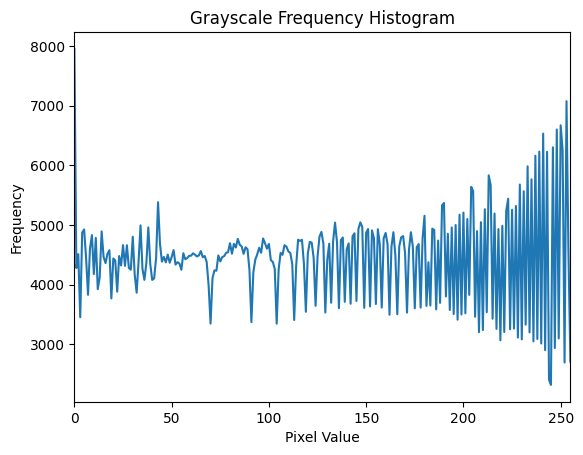

In [ ]:
# Viral Pneumonia
image_path = '/content/Lung Disease Dataset/train/Viral Pneumonia/012.jpeg'
grayscale_frequency_histogram(image_path)

grayscale Intensity

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def grayscale_frequency(image_path):
    image = cv2.imread(image_path)

    if image is None:
        print("Error: Could not open or read the image.")
        return
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    histogram = cv2.calcHist([gray_image], [0], None, [256], [0, 256])

    normalized_histogram = histogram / np.sum(histogram)

    canvas = np.zeros_like(image)

    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1

    for i, freq in enumerate(normalized_histogram):
        x = int(i * image.shape[1] / 256)  # Calculate the x-coordinate
        y = int(image.shape[0] - 30)  # Set a fixed y-coordinate
        color = (255, 255, 255)  # Text color (white)

        cv2.putText(canvas, f'{i}', (x, y), font, font_scale, color, font_thickness)


        rect_height = int(freq * 100)  # Scale the frequency for visualization
        cv2.rectangle(canvas, (x, y - rect_height), (x + 3, y), color, -1)  # Draw filled rectangle

    marked_image = cv2.addWeighted(image, 0.7, canvas, 0.3, 0)

    cv2_imshow( marked_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()



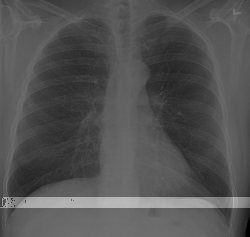

In [ ]:
# Corona Virus
image_path = '/content/Lung Disease Dataset/train/Corona Virus Disease/00030348_000.png'
grayscale_frequency(image_path)

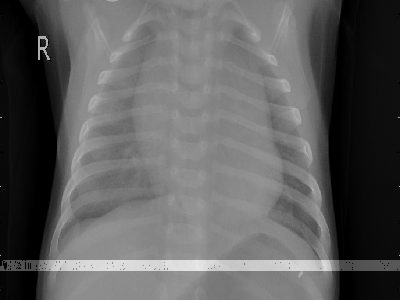

In [ ]:
# Bacterial Pneumonia
image_path = '/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg'
grayscale_frequency(image_path)

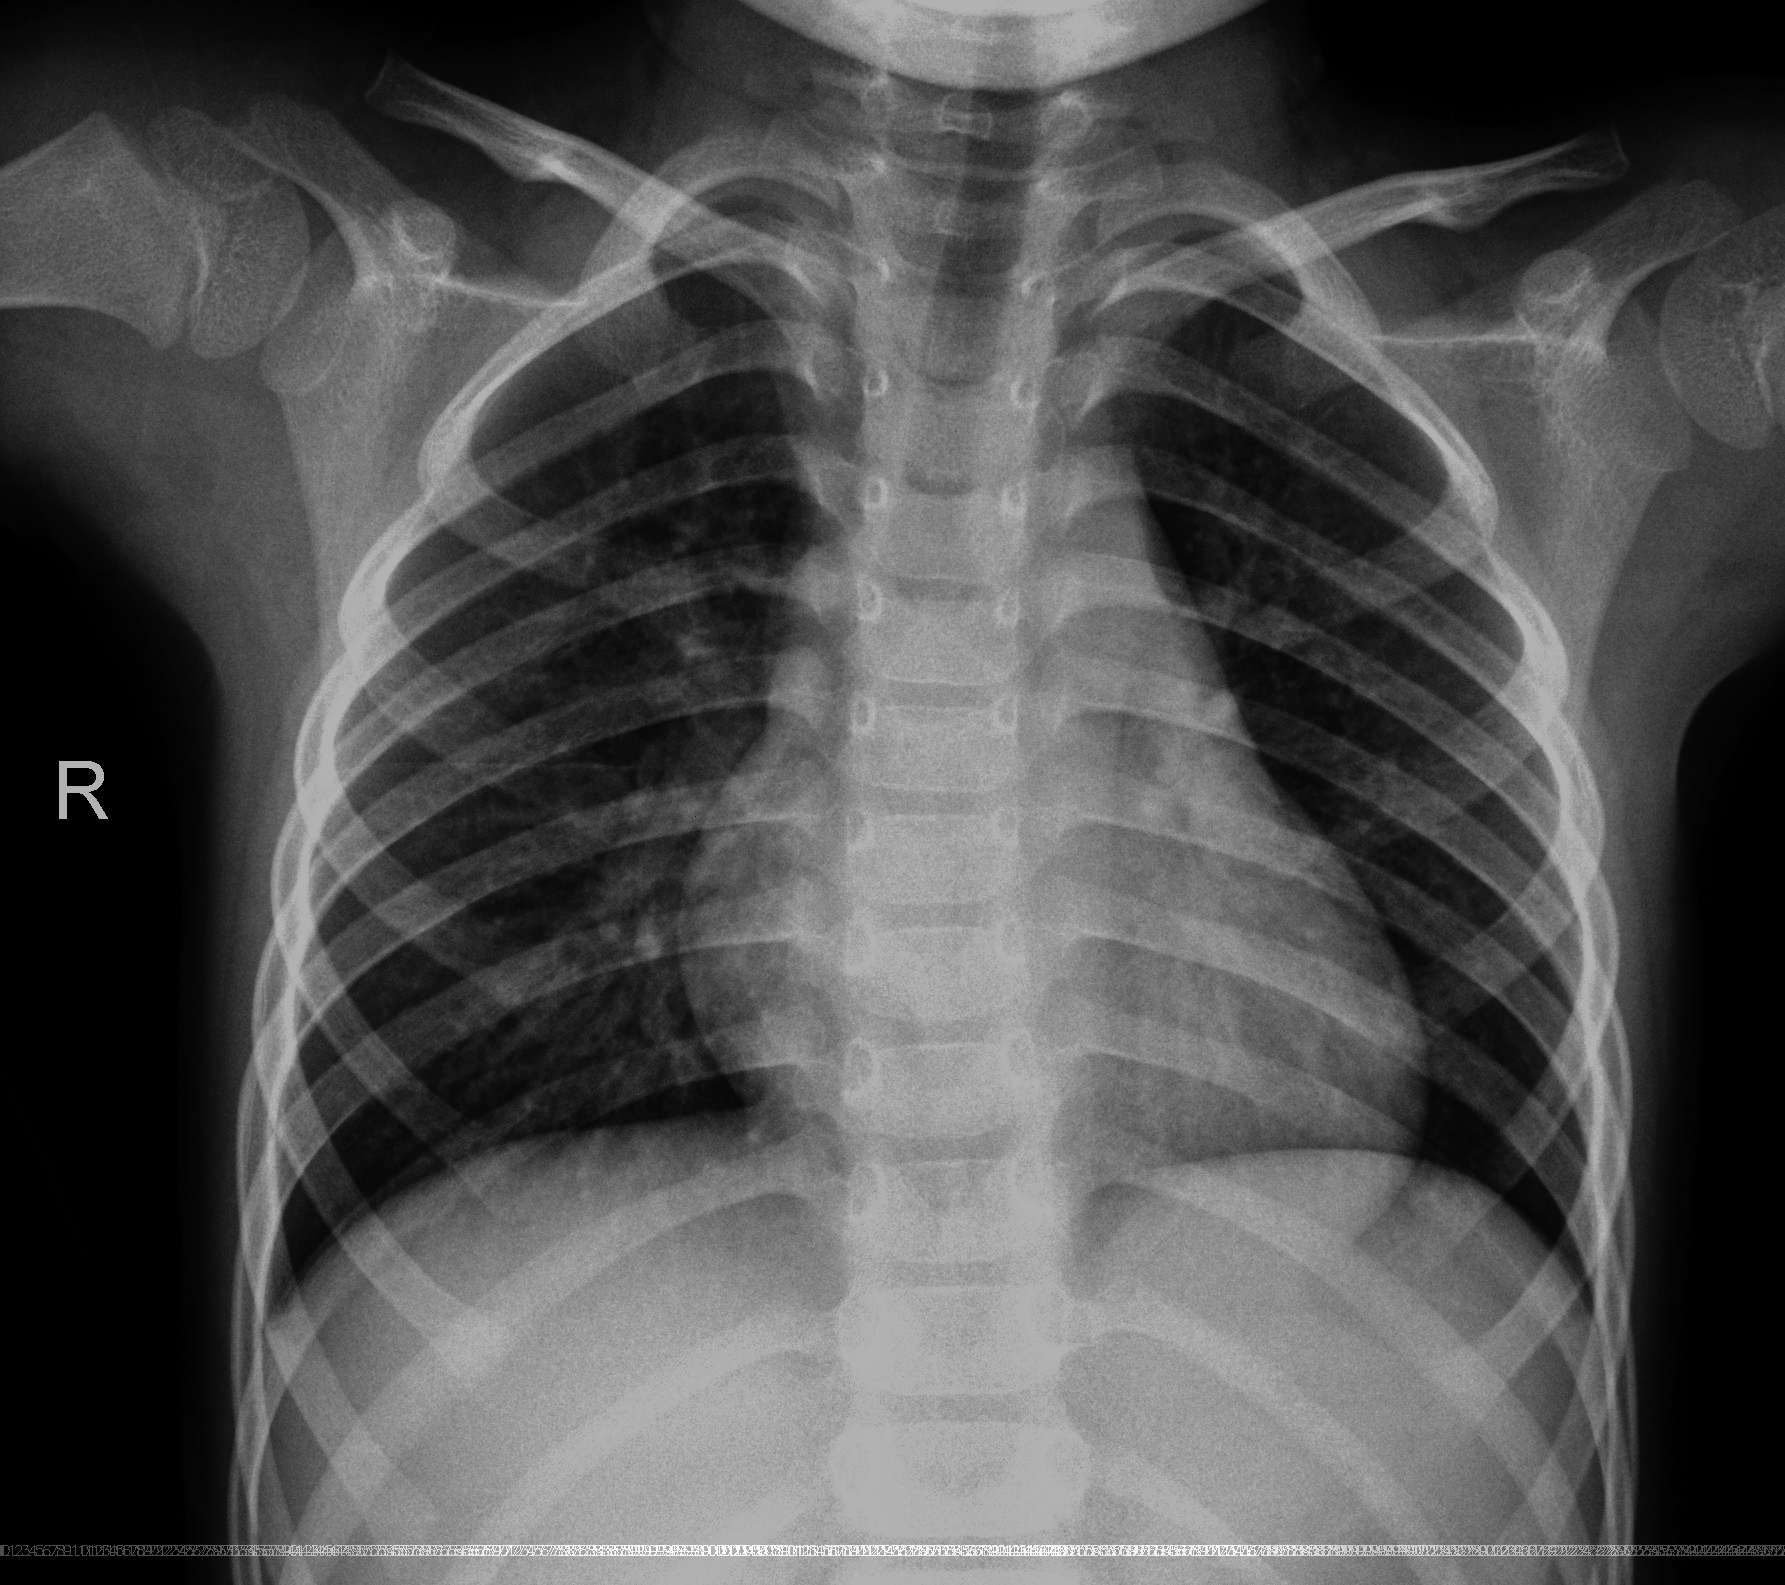

In [ ]:
# Normal
image_path = '/content/Lung Disease Dataset/train/Normal/0101.jpeg'
grayscale_frequency(image_path)

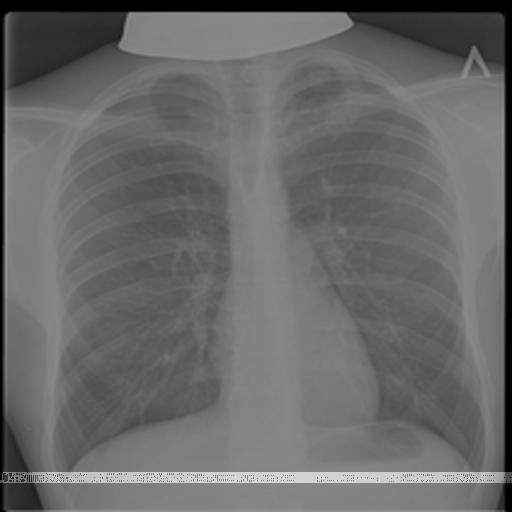

In [ ]:
# Tuberculosis
image_path = '/content/Lung Disease Dataset/train/Tuberculosis/Tuberculosis-102.jpg'
grayscale_frequency(image_path)

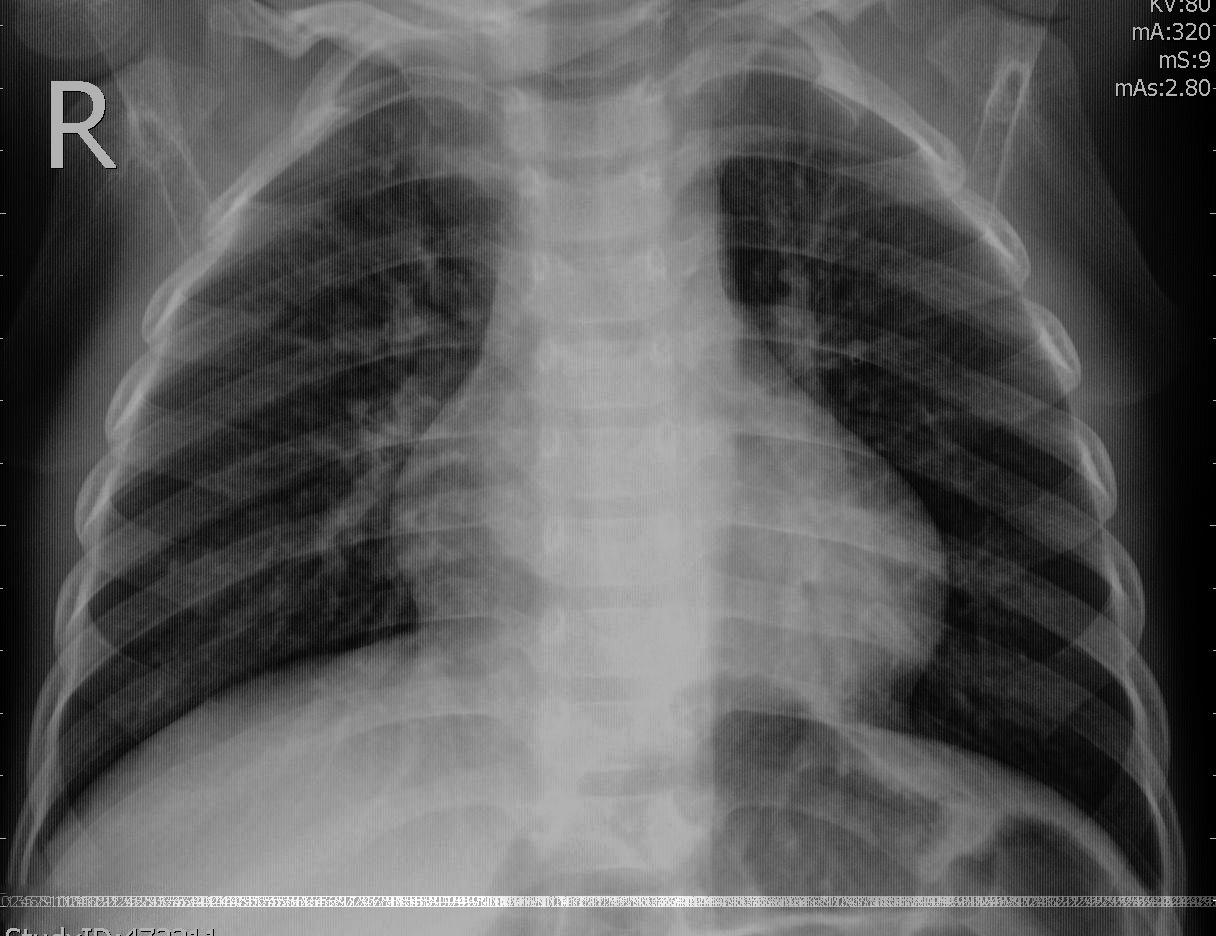

In [ ]:
# Viral Pneumonia
image_path = '/content/Lung Disease Dataset/train/Viral Pneumonia/012.jpeg'
grayscale_frequency(image_path)

Segmentation


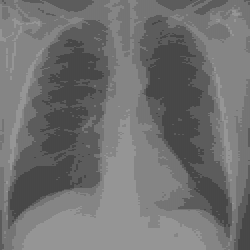

In [ ]:
#Covid Virus

img1 = cv2.imread('/content/Lung Disease Dataset/train/Corona Virus Disease/00030348_000.png', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (250,250))
img2 = cv2.GaussianBlur(img1,(5,5),0)
pixel_vals = img1.reshape((-1,2))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))

cv2_imshow(segmented_image)

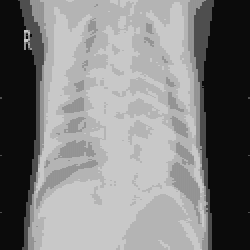

In [ ]:
#bacterial Pneumonia

img1 = cv2.imread('/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (250,250))
img2 = cv2.GaussianBlur(img1,(5,5),0)
pixel_vals = img1.reshape((-1,2))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))

cv2_imshow(segmented_image)

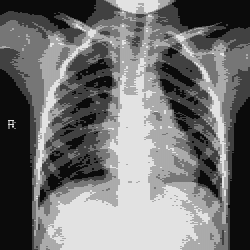

In [ ]:
#Normal

img1 = cv2.imread('/content/Lung Disease Dataset/train/Normal/0101.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (250,250))
img2 = cv2.GaussianBlur(img1,(5,5),0)
pixel_vals = img1.reshape((-1,2))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))

cv2_imshow(segmented_image)

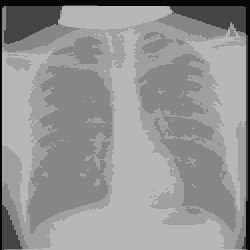

In [ ]:
#tuberculosis

img1 = cv2.imread('/content/Lung Disease Dataset/train/Tuberculosis/Tuberculosis-102.jpg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (250,250))
img2 = cv2.GaussianBlur(img1,(5,5),0)
pixel_vals = img1.reshape((-1,2))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))

cv2_imshow(segmented_image)

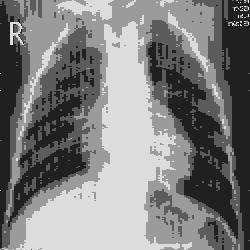

In [ ]:
#Viral Pneumonia

img1 = cv2.imread('/content/Lung Disease Dataset/train/Viral Pneumonia/012.jpeg', cv2.IMREAD_GRAYSCALE)
img1 = cv2.resize(img1, (250,250))
img2 = cv2.GaussianBlur(img1,(5,5),0)
pixel_vals = img1.reshape((-1,2))
pixel_vals = np.float32(pixel_vals)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)
k = 5
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((img2.shape))

cv2_imshow(segmented_image)

Edge Detection

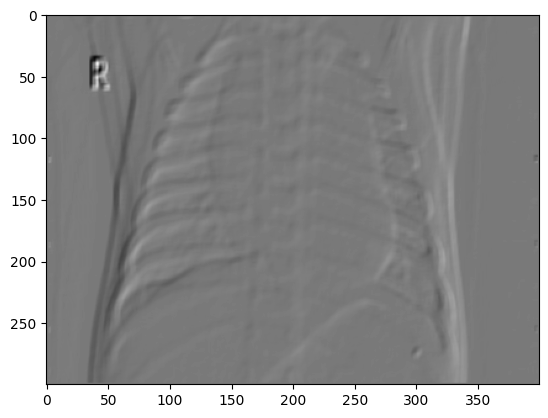

In [ ]:
#Bacterial Pneumonia

img1 = cv2.imread('/content/Lung Disease Dataset/train/Bacterial Pneumonia/10.jpeg', cv2.IMREAD_GRAYSCALE)
#box filter for the image
img1_box = cv2.blur(img1,(5,5))
#gaussian blur filter for the image
img1_gb = cv2.GaussianBlur(img1,(5,5),0)
#weighted average filter for the image
kernel = np.ones((5,5),np.float32)/25
img1_wa = cv2.filter2D(img1,-1,kernel);

[row, col]= img1_wa.shape;
x_val1_wa = np.zeros([row,col],dtype = int)
y_val1_wa = np.zeros([row,col],dtype = int)

w1 = [1, 1, 1, 0, 0, 0, -1, -1, -1];
w2 = [1, 0, -1, 1, 0, -1, 1, 0, -1];

for x in range(2,row-1,1):
  for y in range(2,col-1,1):
    x_val1_wa[x,y] = w1[0]*img1_wa[x-1][y-1]+w1[1]*img1_wa[x-1][y]+w1[2]*img1_wa[x-1][y+1]+w1[3]*img1_wa[x][y-1]+w1[4]*img1_wa[x][y]+w1[5]*img1_wa[x][y+1]+w1[6]*img1_wa[x+1][y-1]+w1[7]*img1_wa[x+1][y]+w1[8]*img1_wa[x+1][y+1];
    y_val1_wa[x,y] = w2[0]*img1_wa[x-1][y-1]+w2[1]*img1_wa[x-1][y]+w2[2]*img1_wa[x-1][y+1]+w2[3]*img1_wa[x][y-1]+w2[4]*img1_wa[x][y]+w2[5]*img1_wa[x][y+1]+w2[6]*img1_wa[x+1][y-1]+w2[7]*img1_wa[x+1][y]+w2[8]*img1_wa[x+1][y+1];

out_img1_wa = x_val1_wa + y_val1_wa

gradient_magnitude = np.sqrt(np.square(x_val1_wa) + np.square(y_val1_wa))
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(out_img1_wa,cmap='gray')

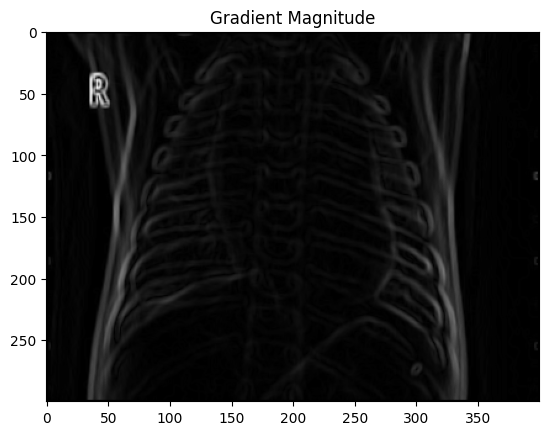

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

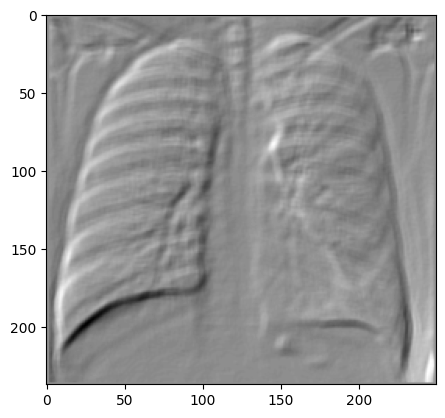

In [ ]:
#Covid Virus

img1 = cv2.imread('/content/Lung Disease Dataset/train/Corona Virus Disease/00030348_000.png', cv2.IMREAD_GRAYSCALE)
#box filter for the image
img1_box = cv2.blur(img1,(5,5))
#gaussian blur filter for the image
img1_gb = cv2.GaussianBlur(img1,(5,5),0)
#weighted average filter for the image
kernel = np.ones((5,5),np.float32)/25
img1_wa = cv2.filter2D(img1,-1,kernel);

[row, col]= img1_wa.shape;
x_val1_wa = np.zeros([row,col],dtype = int)
y_val1_wa = np.zeros([row,col],dtype = int)

w1 = [1, 1, 1, 0, 0, 0, -1, -1, -1];
w2 = [1, 0, -1, 1, 0, -1, 1, 0, -1];

for x in range(2,row-1,1):
  for y in range(2,col-1,1):
    x_val1_wa[x,y] = w1[0]*img1_wa[x-1][y-1]+w1[1]*img1_wa[x-1][y]+w1[2]*img1_wa[x-1][y+1]+w1[3]*img1_wa[x][y-1]+w1[4]*img1_wa[x][y]+w1[5]*img1_wa[x][y+1]+w1[6]*img1_wa[x+1][y-1]+w1[7]*img1_wa[x+1][y]+w1[8]*img1_wa[x+1][y+1];
    y_val1_wa[x,y] = w2[0]*img1_wa[x-1][y-1]+w2[1]*img1_wa[x-1][y]+w2[2]*img1_wa[x-1][y+1]+w2[3]*img1_wa[x][y-1]+w2[4]*img1_wa[x][y]+w2[5]*img1_wa[x][y+1]+w2[6]*img1_wa[x+1][y-1]+w2[7]*img1_wa[x+1][y]+w2[8]*img1_wa[x+1][y+1];

out_img1_wa = x_val1_wa + y_val1_wa

gradient_magnitude = np.sqrt(np.square(x_val1_wa) + np.square(y_val1_wa))
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(out_img1_wa,cmap='gray')

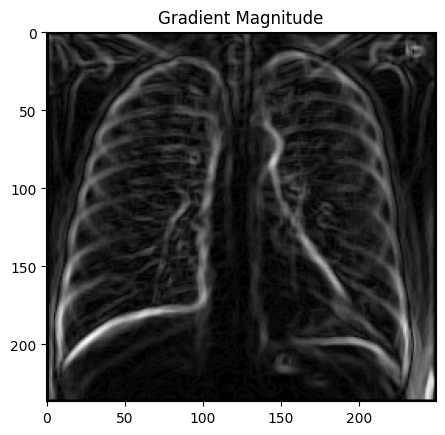

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

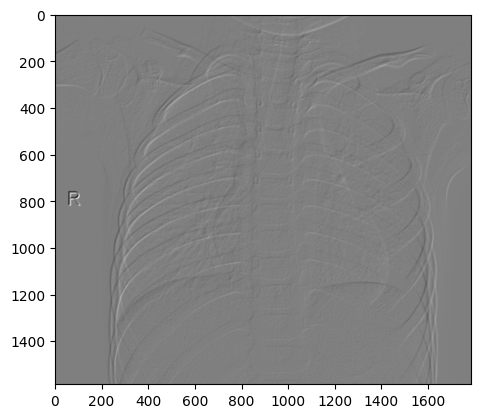

In [ ]:
#Normal

img1 = cv2.imread('/content/Lung Disease Dataset/train/Normal/0101.jpeg', cv2.IMREAD_GRAYSCALE)
#box filter for the image
img1_box = cv2.blur(img1,(5,5))
#gaussian blur filter for the image
img1_gb = cv2.GaussianBlur(img1,(5,5),0)
#weighted average filter for the image
kernel = np.ones((5,5),np.float32)/25
img1_wa = cv2.filter2D(img1,-1,kernel);

[row, col]= img1_wa.shape;
x_val1_wa = np.zeros([row,col],dtype = int)
y_val1_wa = np.zeros([row,col],dtype = int)

w1 = [1, 1, 1, 0, 0, 0, -1, -1, -1];
w2 = [1, 0, -1, 1, 0, -1, 1, 0, -1];

for x in range(2,row-1,1):
  for y in range(2,col-1,1):
    x_val1_wa[x,y] = w1[0]*img1_wa[x-1][y-1]+w1[1]*img1_wa[x-1][y]+w1[2]*img1_wa[x-1][y+1]+w1[3]*img1_wa[x][y-1]+w1[4]*img1_wa[x][y]+w1[5]*img1_wa[x][y+1]+w1[6]*img1_wa[x+1][y-1]+w1[7]*img1_wa[x+1][y]+w1[8]*img1_wa[x+1][y+1];
    y_val1_wa[x,y] = w2[0]*img1_wa[x-1][y-1]+w2[1]*img1_wa[x-1][y]+w2[2]*img1_wa[x-1][y+1]+w2[3]*img1_wa[x][y-1]+w2[4]*img1_wa[x][y]+w2[5]*img1_wa[x][y+1]+w2[6]*img1_wa[x+1][y-1]+w2[7]*img1_wa[x+1][y]+w2[8]*img1_wa[x+1][y+1];

out_img1_wa = x_val1_wa + y_val1_wa

gradient_magnitude = np.sqrt(np.square(x_val1_wa) + np.square(y_val1_wa))
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(out_img1_wa,cmap='gray')

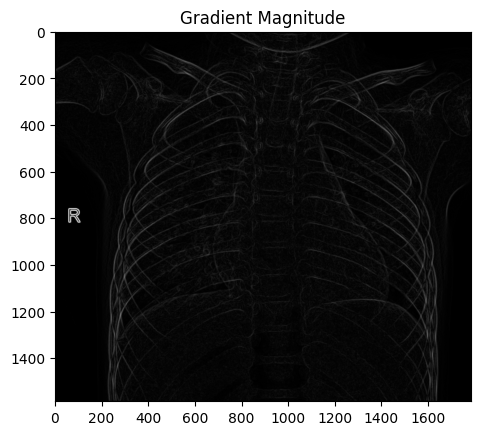

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

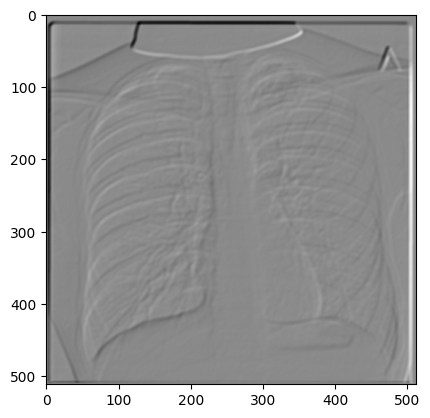

In [ ]:
#Tubercolosis

img1 = cv2.imread('/content/Lung Disease Dataset/train/Tuberculosis/Tuberculosis-102.jpg', cv2.IMREAD_GRAYSCALE)
#box filter for the image
img1_box = cv2.blur(img1,(5,5))
#gaussian blur filter for the image
img1_gb = cv2.GaussianBlur(img1,(5,5),0)
#weighted average filter for the image
kernel = np.ones((5,5),np.float32)/25
img1_wa = cv2.filter2D(img1,-1,kernel);

[row, col]= img1_wa.shape;
x_val1_wa = np.zeros([row,col],dtype = int)
y_val1_wa = np.zeros([row,col],dtype = int)

w1 = [1, 1, 1, 0, 0, 0, -1, -1, -1];
w2 = [1, 0, -1, 1, 0, -1, 1, 0, -1];

for x in range(2,row-1,1):
  for y in range(2,col-1,1):
    x_val1_wa[x,y] = w1[0]*img1_wa[x-1][y-1]+w1[1]*img1_wa[x-1][y]+w1[2]*img1_wa[x-1][y+1]+w1[3]*img1_wa[x][y-1]+w1[4]*img1_wa[x][y]+w1[5]*img1_wa[x][y+1]+w1[6]*img1_wa[x+1][y-1]+w1[7]*img1_wa[x+1][y]+w1[8]*img1_wa[x+1][y+1];
    y_val1_wa[x,y] = w2[0]*img1_wa[x-1][y-1]+w2[1]*img1_wa[x-1][y]+w2[2]*img1_wa[x-1][y+1]+w2[3]*img1_wa[x][y-1]+w2[4]*img1_wa[x][y]+w2[5]*img1_wa[x][y+1]+w2[6]*img1_wa[x+1][y-1]+w2[7]*img1_wa[x+1][y]+w2[8]*img1_wa[x+1][y+1];

out_img1_wa = x_val1_wa + y_val1_wa

gradient_magnitude = np.sqrt(np.square(x_val1_wa) + np.square(y_val1_wa))
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(out_img1_wa,cmap='gray')

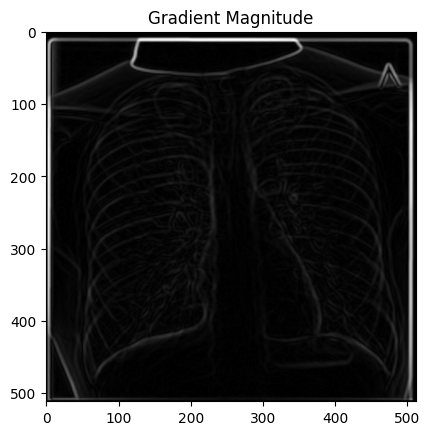

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

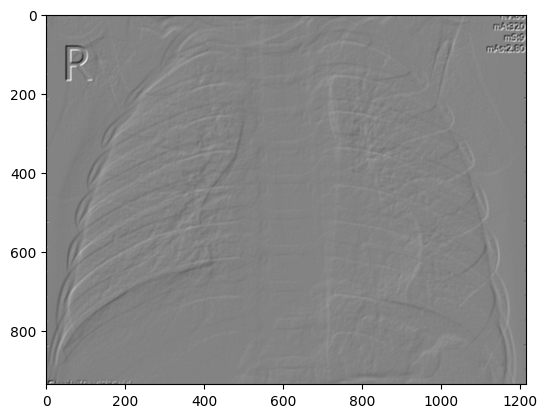

In [ ]:
#Viral Pneumonia

img1 = cv2.imread('/content/Lung Disease Dataset/train/Viral Pneumonia/012.jpeg', cv2.IMREAD_GRAYSCALE)
#box filter for the image
img1_box = cv2.blur(img1,(5,5))
#gaussian blur filter for the image
img1_gb = cv2.GaussianBlur(img1,(5,5),0)
#weighted average filter for the image
kernel = np.ones((5,5),np.float32)/25
img1_wa = cv2.filter2D(img1,-1,kernel);

[row, col]= img1_wa.shape;
x_val1_wa = np.zeros([row,col],dtype = int)
y_val1_wa = np.zeros([row,col],dtype = int)

w1 = [1, 1, 1, 0, 0, 0, -1, -1, -1];
w2 = [1, 0, -1, 1, 0, -1, 1, 0, -1];

for x in range(2,row-1,1):
  for y in range(2,col-1,1):
    x_val1_wa[x,y] = w1[0]*img1_wa[x-1][y-1]+w1[1]*img1_wa[x-1][y]+w1[2]*img1_wa[x-1][y+1]+w1[3]*img1_wa[x][y-1]+w1[4]*img1_wa[x][y]+w1[5]*img1_wa[x][y+1]+w1[6]*img1_wa[x+1][y-1]+w1[7]*img1_wa[x+1][y]+w1[8]*img1_wa[x+1][y+1];
    y_val1_wa[x,y] = w2[0]*img1_wa[x-1][y-1]+w2[1]*img1_wa[x-1][y]+w2[2]*img1_wa[x-1][y+1]+w2[3]*img1_wa[x][y-1]+w2[4]*img1_wa[x][y]+w2[5]*img1_wa[x][y+1]+w2[6]*img1_wa[x+1][y-1]+w2[7]*img1_wa[x+1][y]+w2[8]*img1_wa[x+1][y+1];

out_img1_wa = x_val1_wa + y_val1_wa

gradient_magnitude = np.sqrt(np.square(x_val1_wa) + np.square(y_val1_wa))
gradient_magnitude *= 255.0 / gradient_magnitude.max()

plt.imshow(out_img1_wa,cmap='gray')

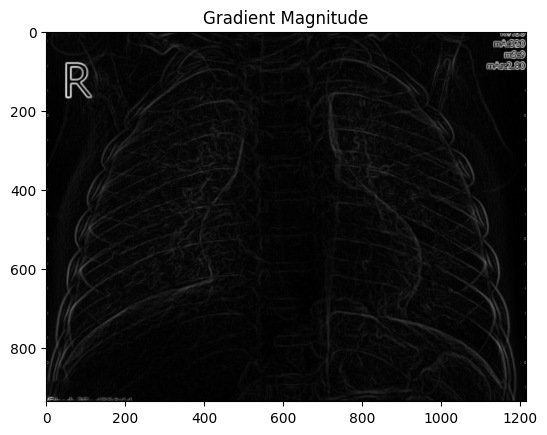

In [ ]:
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.show()

Model training and deployment:-


In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential

VGG

In [ ]:
from keras.applications.vgg19 import VGG19
vgg19_model = VGG19(weights="imagenet",include_top = False)
for layer in vgg19_model.layers:
    layer.trainable = False

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
vgg19_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
model1 = Sequential()
model1.add(layers.Input(shape=(224,224,3)))
model1.add(layers.Lambda(keras.applications.vgg19.preprocess_input))
model1.add(vgg19_model)
model1.add(layers.GlobalAveragePooling2D())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg19 (Functional)          (None, None, None, 512)   20024384  
                                                                 
 global_average_pooling2d_1  (None, 512)               0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_3 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                16448     
                                                      

In [ ]:
model1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

history = model1.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-15-5ff92cef1ff2>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
161/161 [==============================] - 150s 898ms/step - loss: 1.0959 - accuracy: 0.6125 - val_loss: 0.4983 - val_accuracy: 0.7991
Epoch 2/5
161/161 [==============================] - 141s 876ms/step - loss: 0.5585 - accuracy: 0.7665 - val_loss: 0.4749 - val_accuracy: 0.8070
Epoch 3/5
161/161 [==============================] - 140s 873ms/step - loss: 0.5081 - accuracy: 0.7875 - val_loss: 0.4336 - val_accuracy: 0.8204
Epoch 4/5
161/161 [==============================] - 137s 853ms/step - loss: 0.4510 - accuracy: 0.8164 - val_loss: 0.4136 - val_accuracy: 0.8313
Epoch 5/5
161/161 [==============================] - 139s 864ms/step - loss: 0.4313 - accuracy: 0.8211 - val_loss: 0.3923 - val_accuracy: 0.8398


In [ ]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

64/64 [==============================] - 22s 350ms/step
0.8449382716049383


RESNET

In [ ]:
resnet_model = ResNet50(include_top=False,weights="imagenet")
for layer in resnet_model.layers[:140]:
    layer.trainable = False

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, None, None, 3)        0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, None, None, 64)       9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, None, None, 64)       256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential

In [ ]:
model1 = Sequential()
model1.add(layers.Input(shape=(224,224,3)))
model1.add(layers.Lambda(keras.applications.resnet50.preprocess_input))
model1.add(resnet_model)
model1.add(layers.GlobalAveragePooling2D())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, None, None, 2048   23587712  
                             )                                   
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                1

In [ ]:
model1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

history = model1.fit_generator(trainGenerator,epochs=15,validation_data=validationGenerator)

<ipython-input-9-e9cf8211014f>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(trainGenerator,epochs=15,validation_data=validationGenerator)


Epoch 1/15
161/161 [==============================] - 160s 867ms/step - loss: 0.5891 - accuracy: 0.7805 - val_loss: 1.3320 - val_accuracy: 0.7798
Epoch 2/15
161/161 [==============================] - 137s 853ms/step - loss: 0.3887 - accuracy: 0.8518 - val_loss: 0.3523 - val_accuracy: 0.8497
Epoch 3/15
161/161 [==============================] - 137s 851ms/step - loss: 0.3977 - accuracy: 0.8658 - val_loss: 0.3040 - val_accuracy: 0.8755
Epoch 4/15
161/161 [==============================] - 136s 848ms/step - loss: 0.3016 - accuracy: 0.8844 - val_loss: 0.3164 - val_accuracy: 0.8765
Epoch 5/15
161/161 [==============================] - 138s 858ms/step - loss: 0.2610 - accuracy: 0.8963 - val_loss: 0.3517 - val_accuracy: 0.8710
Epoch 6/15
161/161 [==============================] - 137s 853ms/step - loss: 0.2490 - accuracy: 0.9015 - val_loss: 0.3009 - val_accuracy: 0.8775
Epoch 7/15
161/161 [==============================] - 139s 862ms/step - loss: 0.2246 - accuracy: 0.9110 - val_loss: 0.3255 -

In [ ]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

64/64 [==============================] - 22s 327ms/step
0.8903703703703704


In [ ]:
model1.save('model.hdf5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


VGG16

In [ ]:
from keras.applications.vgg16 import VGG16
vgg16_model = VGG16(weights="imagenet",include_top = False)
for layer in vgg16_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [ ]:
model1 = Sequential()
model1.add(layers.Input(shape=(224,224,3)))
model1.add(layers.Lambda(keras.applications.vgg16.preprocess_input))
model1.add(vgg16_model)
model1.add(layers.GlobalAveragePooling2D())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.3))
model1.add(Dense(5, activation='softmax'))
model1.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_3 (Lambda)           (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 global_average_pooling2d_3   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                16448     
                                                      

In [ ]:
model1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

history = model1.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)

<ipython-input-28-5ff92cef1ff2>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model1.fit_generator(trainGenerator,epochs=5,validation_data=validationGenerator)


Epoch 1/5
161/161 [==============================] - 139s 851ms/step - loss: 1.1042 - accuracy: 0.6090 - val_loss: 0.5187 - val_accuracy: 0.7877
Epoch 2/5
161/161 [==============================] - 137s 849ms/step - loss: 0.5649 - accuracy: 0.7756 - val_loss: 0.4269 - val_accuracy: 0.8294
Epoch 3/5
161/161 [==============================] - 138s 857ms/step - loss: 0.4829 - accuracy: 0.8030 - val_loss: 0.4258 - val_accuracy: 0.8259
Epoch 4/5
161/161 [==============================] - 137s 853ms/step - loss: 0.4350 - accuracy: 0.8184 - val_loss: 0.4082 - val_accuracy: 0.8393
Epoch 5/5
161/161 [==============================] - 138s 857ms/step - loss: 0.4209 - accuracy: 0.8287 - val_loss: 0.4166 - val_accuracy: 0.8234


In [ ]:
CLASS_NAMES = list(trainGenerator.class_indices.keys())
predictions = np.argmax(model1.predict(testGenerator), axis=1)
acc = accuracy_score(testGenerator.labels, predictions)
print(acc)

64/64 [==============================] - 23s 359ms/step
0.8301234567901234


In [ ]:
score_vgg16=84.7
score_vgg19=85.4
score_resnet50=89.8
cnb=74.2
net101=88.6

scores = [score_vgg16,score_vgg19,score_resnet50,net101,cnb]
algorithms = ["VGG16","VGG19","RESNET50","RESNET101","CONVNEXTBASE"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using VGG16 is: 84.7 %
The accuracy score achieved using VGG19 is: 85.4 %
The accuracy score achieved using RESNET50 is: 89.8 %
The accuracy score achieved using RESNET101 is: 88.6 %
The accuracy score achieved using CONVNEXTBASE is: 74.2 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

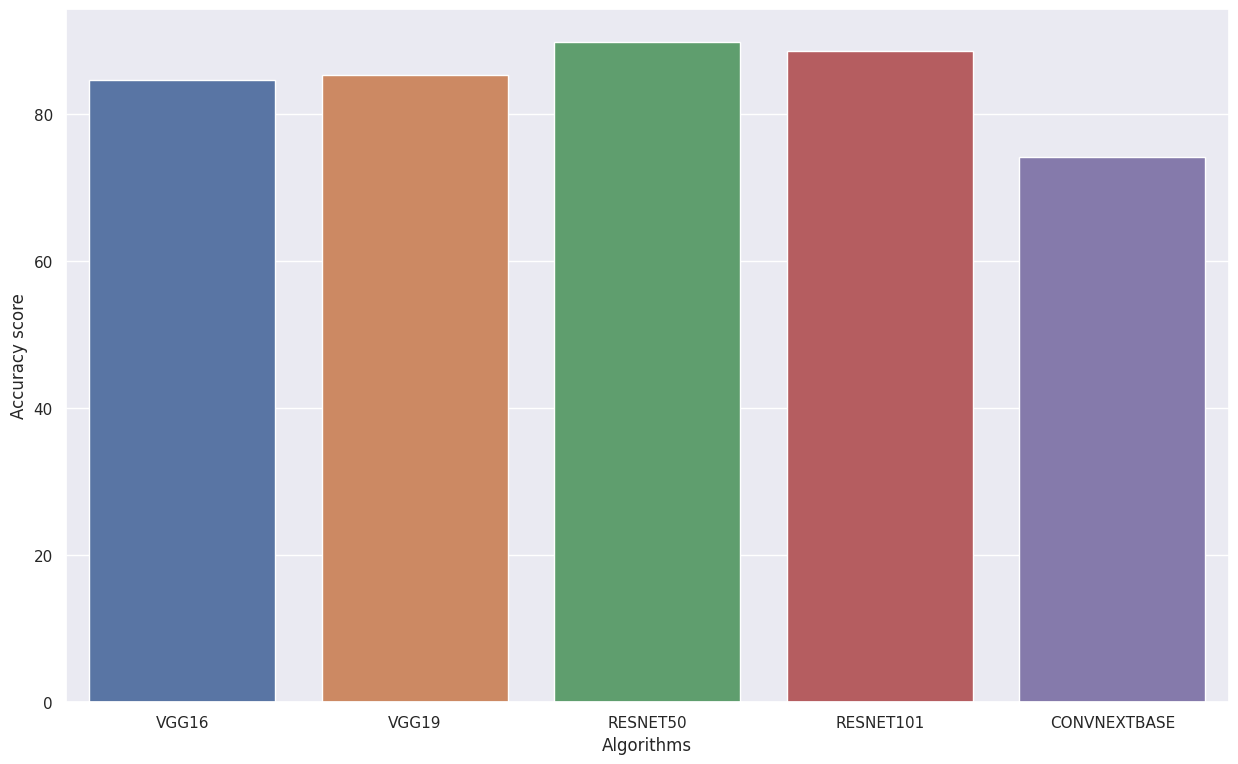

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(15,9)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)